<a href="https://colab.research.google.com/github/Fabio-Morganti/Progetto-Python-Data-Science/blob/main/Progetto_Python_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Progetto Python/dataset_balanced.csv')
data.head()

,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Source,Severity,Start_Time,Street,Side,City,County,State,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(C),Durations,Start_Date,Orario,Year,Month,Day,Day_of_week,Season
0,39.063148,-84.032608,100.0,29.67,10.0,3.5,MapQuest,2,06:49:27,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
1,39.627781,-84.188354,89.0,29.65,6.0,3.5,MapQuest,2,07:39:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
2,39.758274,-84.230507,100.0,29.66,7.0,3.5,MapQuest,2,07:59:35,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:56:00,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
3,39.952812,-83.119293,93.0,29.64,5.0,5.8,MapQuest,3,08:14:42,Outerbelt S,R,Columbus,Franklin,OH,US/Eastern,2016-02-08 07:50:00,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.6,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
4,39.790760,-84.241547,89.0,29.65,10.0,5.8,MapQuest,2,08:37:07,Salem Ave,L,Dayton,Montgomery,OH,US/Eastern,2016-02-08 08:56:00,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno


In [ ]:
def month(m):
  if (m == 1):
    return "01"
  elif (m == 2):
    return "02"
  elif (m == 3):
    return "03"
  elif (m == 4):
    return "04"
  elif (m == 5):
    return "05"
  elif (m == 6):
    return "06"
  elif (m == 7):
    return "07"
  elif (m == 8):
    return "08"
  elif (m == 9):
    return "09"
  elif (m == 10):
    return "10"
  elif (m == 11):
    return "11"
  else:
    return "12"

In [ ]:
data['Year'] = data['Year'].apply(lambda x: str(x))
data['Month'] = data['Month'].apply(lambda x: month(x))
data['Index'] = data['Year'] +"-"+ data['Month']
data['Index'].head()

0    2016-02
1    2016-02
2    2016-02
3    2016-02
4    2016-02
Name: Index, dtype: object

In [ ]:
data_series = pd.DataFrame()

In [ ]:
grouped = data.groupby('Index')

In [ ]:
data_series['Count'] = grouped['Temperature(C)'].count()
data_series.shape

(53, 1)

In [ ]:
data_series['Temperature mean'] = grouped['Temperature(C)'].mean()
data_series.head()

,Count,Temperature mean
Index,,
2016-02,302,0.277931
2016-03,1874,26.151790
2016-04,5324,30.773938
2016-05,5142,34.069980
2016-06,10061,44.949986


In [ ]:
data_series['Index'] = data_series.index
data_series['Index'] = data_series['Index'].apply(lambda x: str(x))
data_series.head()

,Count,Temperature mean,Index
Index,,,
2016-02,302,0.277931,2016-02
2016-03,1874,26.151790,2016-03
2016-04,5324,30.773938,2016-04
2016-05,5142,34.069980,2016-05
2016-06,10061,44.949986,2016-06


In [ ]:
data_series.index

Index(['2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
       '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
       '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
       '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'],
      dtype='object', name='Index')

In [ ]:
data_series.index = pd.period_range('2016-02', '2020-06', freq='M')
data_series.index

PeriodIndex(['2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
             '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
             '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
             '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
             '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
             '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
             '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
             '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'],
            dtype='period[M]', freq='M')

In [ ]:
data_series.isna().sum()

Count               0
Temperature mean    0
Index               0
dtype: int64

In [ ]:
plt.figure()
fig = px.line(data_series, x="Index", y="Count", title='Count of accidents')
plt.savefig('/content/drive/MyDrive/Progetto Python/count_series.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
fig = px.line(data_series, x="Index", y="Temperature mean", title='Temperature mean')
plt.savefig('/content/drive/MyDrive/Progetto Python/temp_mean_series.png')
fig.show()

<Figure size 432x288 with 0 Axes>

Stazionarietà 

In [ ]:
n_accident = data_series.drop(['Index', 'Temperature mean'], axis=1)

In [ ]:
n_accident.head()

,Count
2016-02,302
2016-03,1874
2016-04,5324
2016-05,5142
2016-06,10061


In [ ]:
result = adfuller(n_accident['Count'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.466142
p-value: 0.123931


In [ ]:
print(n_accident['Count'].values)

[  302  1874  5324  5142 10061 16328 20559 19791 19707 22906 20971 19550
 17948 20181 16888 14229 15715 14784 30138 28445 27893 25750 26118 26575
 25724 26691 26052 27819 24159 23496 27283 25762 31426 28612 23759 27014
 24910 23653 26234 26113 22695 24188 27016 29720 36475 28589 32494 30388
 28690 31613 35769 34700 39023]


In [ ]:
result = adfuller(np.diff(n_accident['Count'].values))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.432908
p-value: 0.000000


In [ ]:
result = adfuller(np.diff(np.diff(n_accident['Count'].values)))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.029674
p-value: 0.001263


In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

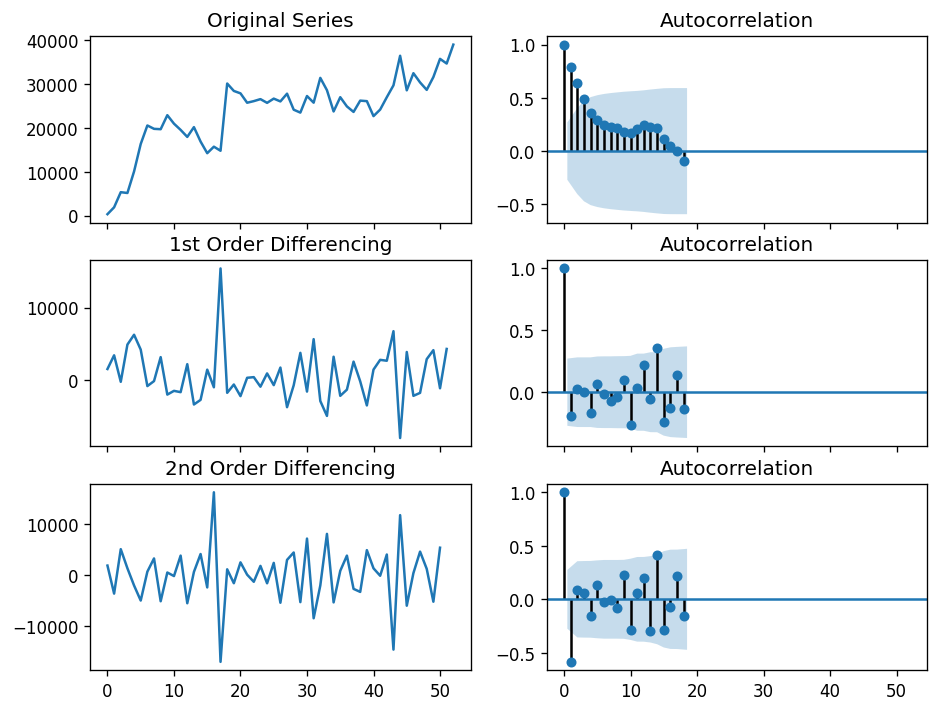

In [ ]:
#Original Series
fig, axes = plt.subplots(3,2, sharex=True)
axes[0,0].plot(n_accident['Count'].values); axes[0,0].set_title('Original Series')
plot_acf(n_accident['Count'].values, ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(np.diff(n_accident['Count'].values)); axes[1,0].set_title('1st Order Differencing')
plot_acf(np.diff(n_accident['Count'].values), ax=axes[1,1])

# 2nd Differencing
axes[2,0].plot(np.diff(np.diff(n_accident['Count'].values))); axes[2,0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(n_accident['Count'].values)), ax=axes[2,1])

plt.savefig('/content/drive/MyDrive/Progetto Python/autocorrelation.png')

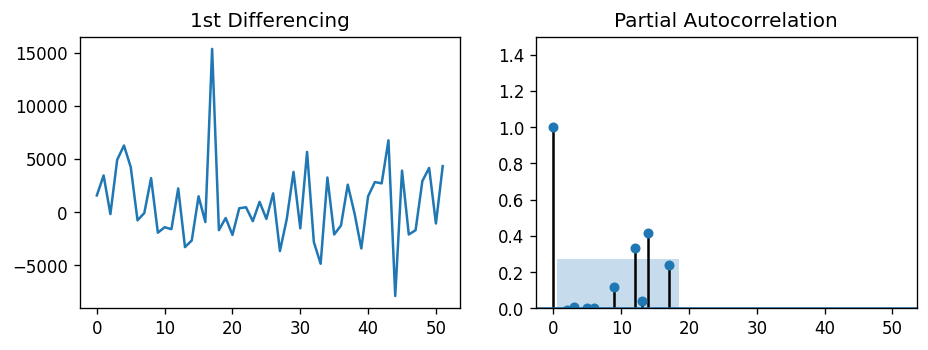

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1,2, sharex=True)
axes[0].plot(np.diff(n_accident['Count'].values)); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.5))
plot_pacf(np.diff(n_accident['Count'].values), ax=axes[1])
plt.savefig('/content/drive/MyDrive/Progetto Python/partial_autocorrelation.png')

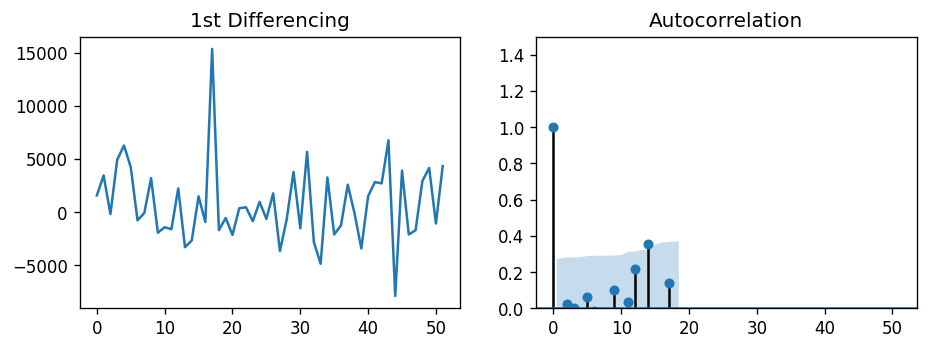

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1,2, sharex=True)
axes[0].plot(np.diff(n_accident['Count'].values)); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.5))
plot_acf(np.diff(n_accident['Count'].values), ax=axes[1])
plt.savefig('/content/drive/MyDrive/Progetto Python/1st_autocorrelation.png')

In [ ]:
# d=1,  p=0, q=0

In [ ]:
df_count = n_accident['Count']

In [ ]:
df_count

2016-02      302
2016-03     1874
2016-04     5324
2016-05     5142
2016-06    10061
2016-07    16328
2016-08    20559
2016-09    19791
2016-10    19707
2016-11    22906
2016-12    20971
2017-01    19550
2017-02    17948
2017-03    20181
2017-04    16888
2017-05    14229
2017-06    15715
2017-07    14784
2017-08    30138
2017-09    28445
2017-10    27893
2017-11    25750
2017-12    26118
2018-01    26575
2018-02    25724
2018-03    26691
2018-04    26052
2018-05    27819
2018-06    24159
2018-07    23496
2018-08    27283
2018-09    25762
2018-10    31426
2018-11    28612
2018-12    23759
2019-01    27014
2019-02    24910
2019-03    23653
2019-04    26234
2019-05    26113
2019-06    22695
2019-07    24188
2019-08    27016
2019-09    29720
2019-10    36475
2019-11    28589
2019-12    32494
2020-01    30388
2020-02    28690
2020-03    31613
2020-04    35769
2020-05    34700
2020-06    39023
Freq: M, Name: Count, dtype: int64

In [ ]:
# ARIMA (0, 1, 0)
model = ARIMA(df_count.values, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   52
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -499.971
Method:                           css   S.D. of innovations           3626.027
Date:                Mon, 11 Jan 2021   AIC                           1003.942
Time:                        14:53:54   BIC                           1007.845
Sample:                             1   HQIC                          1005.439
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        744.6346    502.839      1.481      0.145    -240.913    1730.182


In [ ]:
# ARIMA (2, 1, 1)
model = ARIMA(df_count.values, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   52
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -497.970
Method:                       css-mle   S.D. of innovations           3430.298
Date:                Mon, 11 Jan 2021   AIC                           1005.940
Time:                        14:53:55   BIC                           1015.696
Sample:                             1   HQIC                          1009.680
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        555.9214    150.291      3.699      0.001     261.357     850.486
ar.L1.D.y      0.7212      0.142      5.096      0.000       0.444       0.999
ar.L2.D.y      0.0972      0.149      0.652      0.5

In [ ]:
# ARIMA (1, 1, 1)
model = ARIMA(df_count.values, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -498.182
Method:                       css-mle   S.D. of innovations           3436.390
Date:                Mon, 11 Jan 2021   AIC                           1004.363
Time:                        14:53:55   BIC                           1012.168
Sample:                             1   HQIC                          1007.356
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.1528    125.449      4.234      0.000     285.278     777.028
ar.L1.D.y      0.7795      0.110      7.092      0.000       0.564       0.995
ma.L1.D.y     -1.0000      0.062    -16.041      0.0

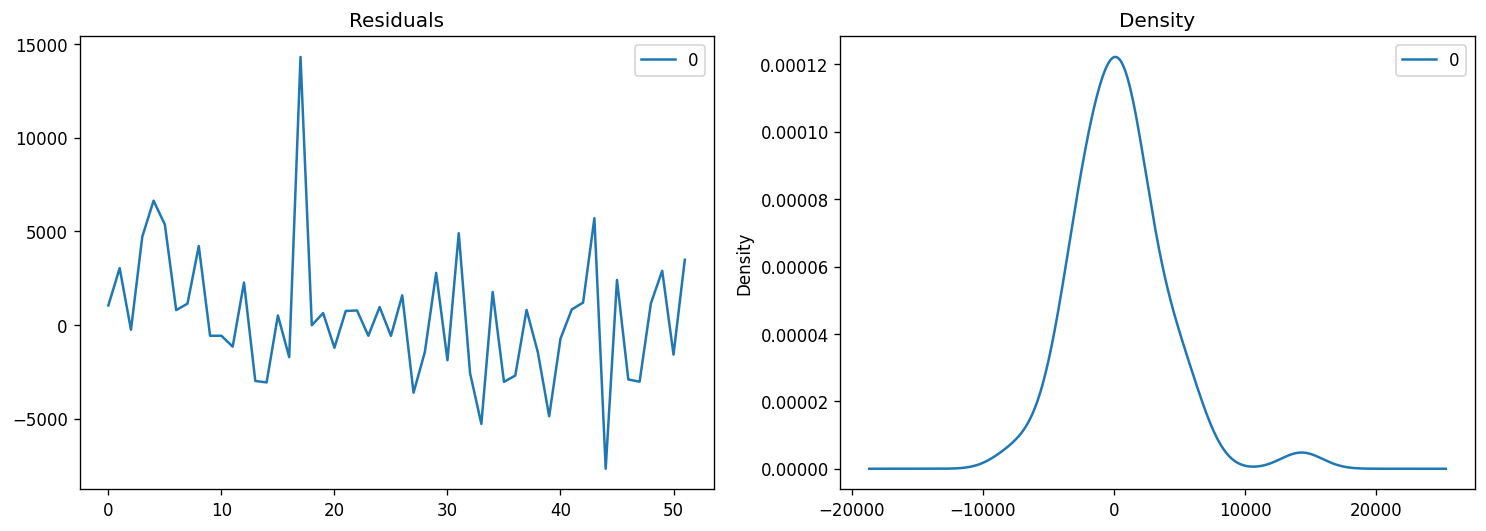

In [ ]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.savefig('/content/drive/MyDrive/Progetto Python/residuals.png')
plt.show()

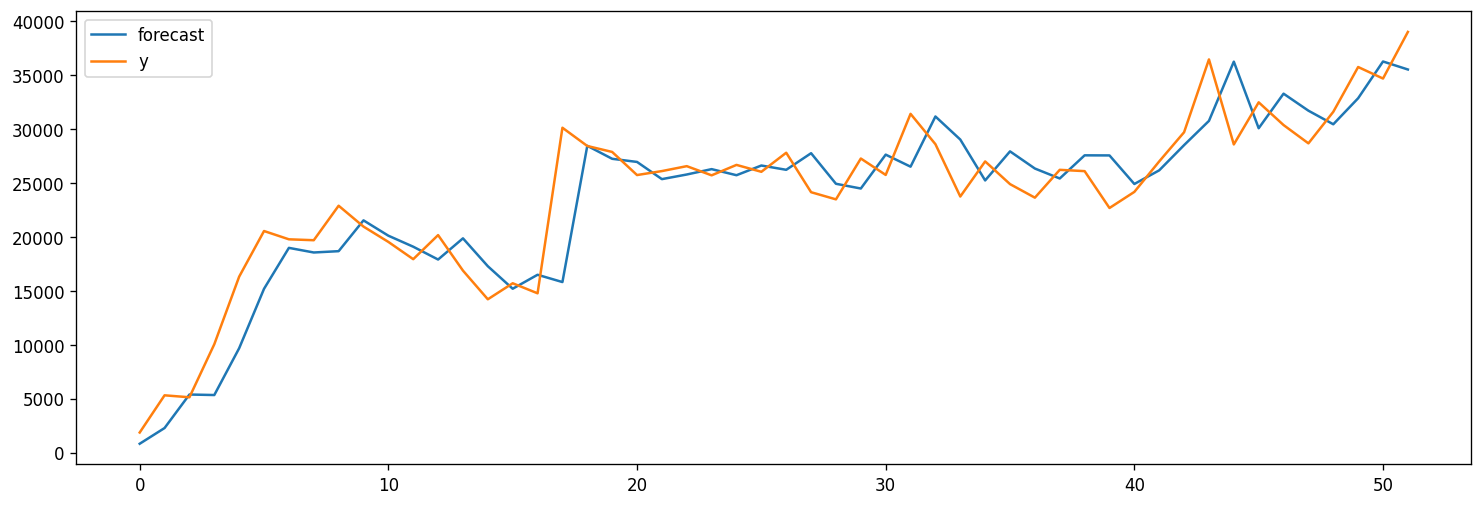

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.savefig('/content/drive/MyDrive/Progetto Python/actual_fitted.png')
plt.show()

Create Training and Test

In [ ]:
# df_count = np.float64(df_count)

In [ ]:
df_count = df_count.apply(lambda x: np.float64(x))

In [ ]:
df_count.head()

2016-02      302.0
2016-03     1874.0
2016-04     5324.0
2016-05     5142.0
2016-06    10061.0
Freq: M, Name: Count, dtype: float64

In [ ]:
n = len(df_count)
train = df_count[:int(0.8*n)]
test = df_count[int(0.8*n):]
print(train.shape)
print(test.shape)

(42,)
(11,)


In [ ]:
print(train.dtype)

float64


In [ ]:
print(train)

2016-02      302.0
2016-03     1874.0
2016-04     5324.0
2016-05     5142.0
2016-06    10061.0
2016-07    16328.0
2016-08    20559.0
2016-09    19791.0
2016-10    19707.0
2016-11    22906.0
2016-12    20971.0
2017-01    19550.0
2017-02    17948.0
2017-03    20181.0
2017-04    16888.0
2017-05    14229.0
2017-06    15715.0
2017-07    14784.0
2017-08    30138.0
2017-09    28445.0
2017-10    27893.0
2017-11    25750.0
2017-12    26118.0
2018-01    26575.0
2018-02    25724.0
2018-03    26691.0
2018-04    26052.0
2018-05    27819.0
2018-06    24159.0
2018-07    23496.0
2018-08    27283.0
2018-09    25762.0
2018-10    31426.0
2018-11    28612.0
2018-12    23759.0
2019-01    27014.0
2019-02    24910.0
2019-03    23653.0
2019-04    26234.0
2019-05    26113.0
2019-06    22695.0
2019-07    24188.0
Freq: M, Name: Count, dtype: float64


In [ ]:
# Arima da errore SVD not converge e abbiamo provato sarimax e il forecast ha un solo valore di output al posto di 3

#model = ARIMA(train, order=(1,1,1))
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
fitted = model.fit(disp=0)

res = fitted.get_forecast(11)
fcast = res.summary_frame()

print(fcast)

Count            mean       mean_se  mean_ci_lower  mean_ci_upper
2019-08  24037.520952   3595.174998   16991.107438   31083.934465
2019-09  24063.543000   4875.845345   14507.061730   33620.024270
2019-10  24059.043058   5913.423242   12468.946478   35649.139638
2019-11  24059.821224   6789.921809   10751.819022   37367.823427
2019-12  24059.686657   7566.234728    9230.139093   38889.234222
2020-01  24059.709928   8269.883790    7851.035544   40268.384312
2020-02  24059.705904   8918.203803    6580.347644   41539.064164
2020-03  24059.706600   9522.483207    5395.982471   42723.430728
2020-04  24059.706479  10090.640370    4282.414773   43836.998186
2020-05  24059.706500  10628.469228    3228.289603   44891.123398
2020-06  24059.706496  11140.363255    2224.995742   45894.417251


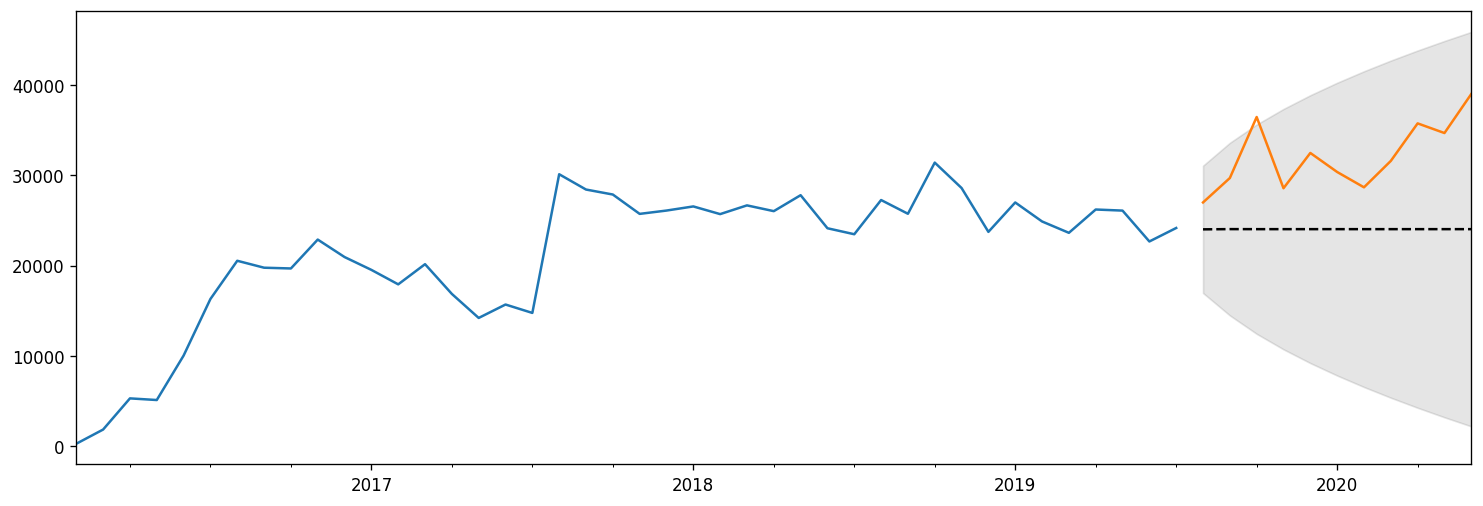

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
train.plot(ax=ax)

# Construct the forecasts
fcast['mean'].plot(ax=ax, style='k--')
test.plot(ax=ax)
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

plt.savefig('/content/drive/MyDrive/Progetto Python/test_train_forecast.png')

In [ ]:
def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast-actual)/np.abs(actual))
  me = np.mean(forecast-actual)
  mae = np.mean(np.abs(forecast-actual))
  mpe = np.mean((forecast-actual)/actual)
  rmse = np.mean((forecast-actual)**2)**.5
  corr = np.corrcoef(forecast, actual)[0,1]
  mins = np.amin(np.hstack([forecast[:,None],actual[:,None]]),axis=1)
  maxs = np.amax(np.hstack([forecast[:,None],actual[:,None]]),axis=1)
  minmax = 1 - np.mean(mins/maxs)
  acf1 = acf(forecast-actual)[1]
  return ({'mape': mape, 'me': me, 'mae': mae, 'mpe': mpe, 'rmse': rmse, 'acf1': acf1, 'corr': corr, 'minmax': minmax})

In [ ]:
forecast_accuracy(fcast['mean'], test.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



{'acf1': 0.12016336017921295,
 'corr': 0.39021261568988214,
 'mae': 8167.194836499416,
 'mape': 0.24408842489655902,
 'me': -8167.194836499416,
 'minmax': 0.24408842489655913,
 'mpe': -0.24408842489655902,
 'rmse': 8941.408292583948}